# Customer Segmentation


Life cycle of Customer Segmentation Project

* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Clustring analysis
* Choose optimal hyperparameters
* Visulization and interpretation

### Understanding the Problem Statement

Objective: Analyze the customer dataset using unsupervised learning techniques to identify customer segments and provide recommendations for targeted marketing strategies.

### Data Collection

Dataset: The provided dataset can be found on Kaggle - Mall Customer Segmentation Data. It contains information about mall customers, including: 

Link:- https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python 

* The dataset consists of 5 column and 200 rows.

#### 2.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Data Checks to perform

Import the CSV Data as Pandas DataFrame

In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")

Show the top 5 Recoreds

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Shape of the dataset

In [ ]:
df.shape

(200, 5)

Check statistics of data set

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##### Insight
* From above description of numerical data, all means are very close to each other - between 38 and 60
* All standard deviations are also close - between 14 and 26.26
* While there is a minimum score 18 for Age, for Annual Income (k$) min score is 15 and for Spending Score (1-100) min score is 1

Check datatypes of data set

In [ ]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

#### Check Missing values

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no missing values in the dataset

In the dataset CustomerID is not use for build the clustering model.
we remove that column

In [ ]:
df.drop(['CustomerID'],axis=True,inplace=True)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Exploratory data analysis

#### Distribution plot

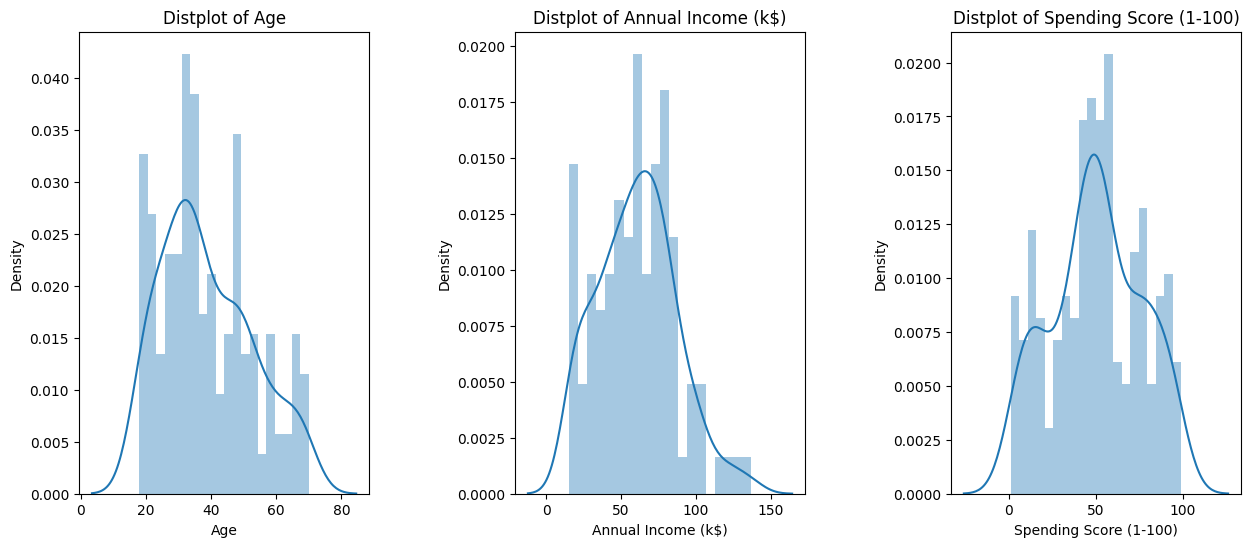

In [ ]:
plt.figure(figsize=(15,6))
n=0
for i in ["Age",	"Annual Income (k$)",	"Spending Score (1-100)"]:
  n+=1
  plt.subplot(1, 3, n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(df[i], bins=20)
  plt.title("Distplot of {}".format(i))
plt.show()

#### Insights
* In Age column most of the data is in between 20-45 
* In the Annual income most of the data points are in between 50-100 
* In the spending score most of the data are in 40-60 

#### Bar graph


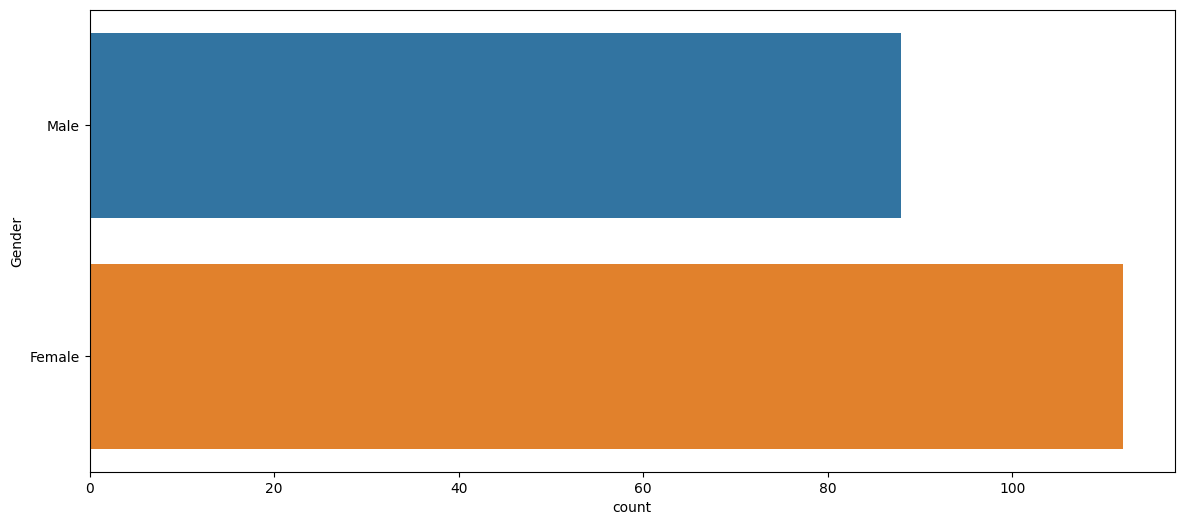

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(y='Gender',data=df)
plt.show()

##### Insights
* From the Age column most of the females are higher then the male customers

#### Violinplot


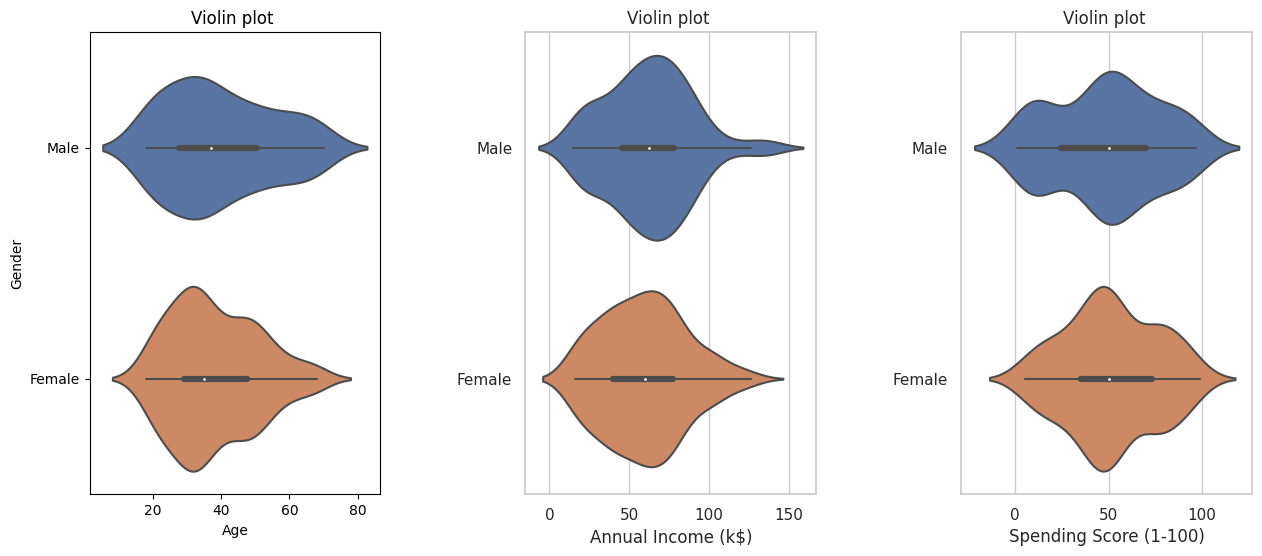

In [ ]:
plt.figure(figsize=(15,6))
n=0
for i in ["Age",	"Annual Income (k$)",	"Spending Score (1-100)"]:
  n+=1
  plt.subplot(1, 3, n)
  sns.set(style="whitegrid")
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.violinplot(x = i ,y= 'Gender',data=df)
  plt.ylabel('Gender' if n ==1 else '')
  plt.title("Violin plot ")
plt.show()

#### Insights
* Age column most of the females are highly distributed in 20-45 range and males also 24-44 
* In Annual income column females are highly distributed in 45-100 and male persons $ 60-120 
* In spending score column females are highly distributed in 45-60 and male persons 44-56

#### Barplot
* In the age column seperate the ranges wise values are seperated and plot the barplot

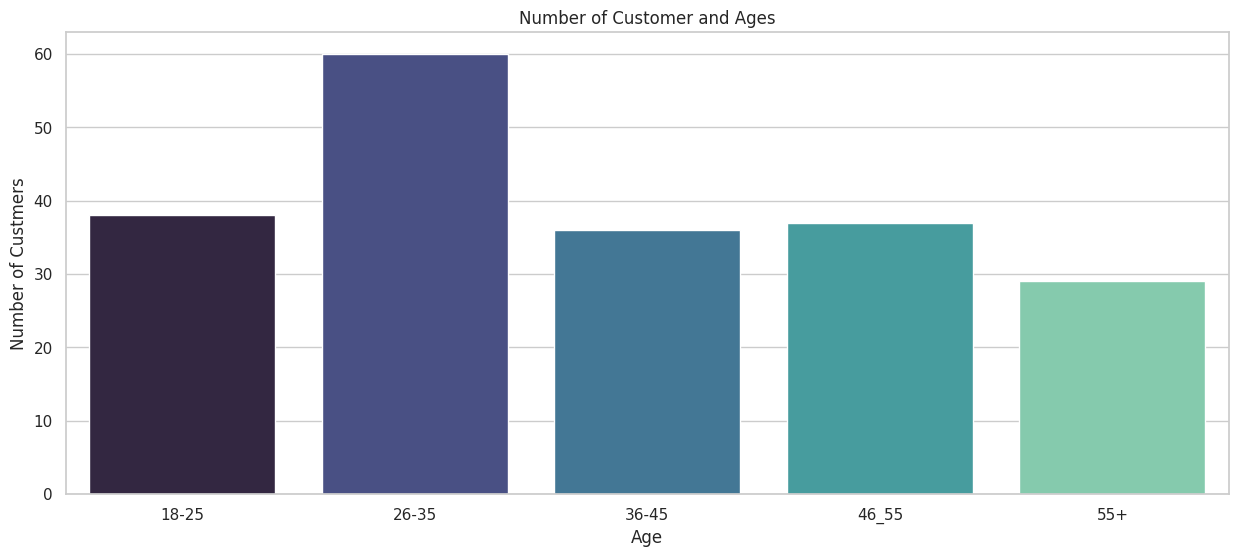

In [ ]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_38_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55_above = df.Age[(df.Age >= 56)]

ages_range = ["18-25","26-35","36-45","46_55","55+"]
ages_len = [len(age_18_25.values),len(age_26_35.values),len(age_38_45.values),len(age_46_55.values),len(age_55_above.values),]

plt.figure(figsize=(15,6))
sns.barplot(x=ages_range, y= ages_len, palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Custmers")
plt.show()


#### Insights
* In the interpretation of age columns with the 5 ranges high number of customers are in the 26-35 ages people after that 18-25 ages people

#### Relational plot

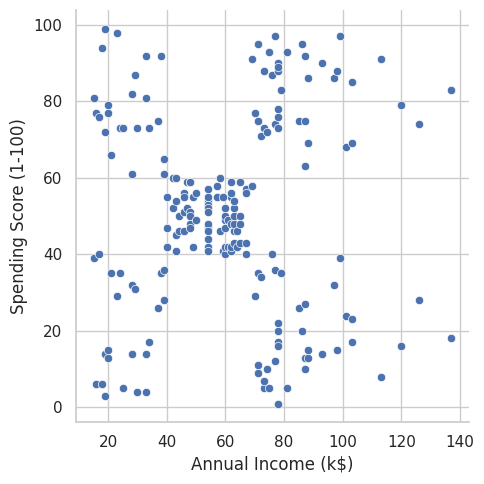

In [ ]:
sns.relplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df)
plt.show()

#### Insights
* From the above relation plot maximum people annual income is $40-60k and the sepending score 40-60

#### To seperate the spending score in 5 parts for better understanding 

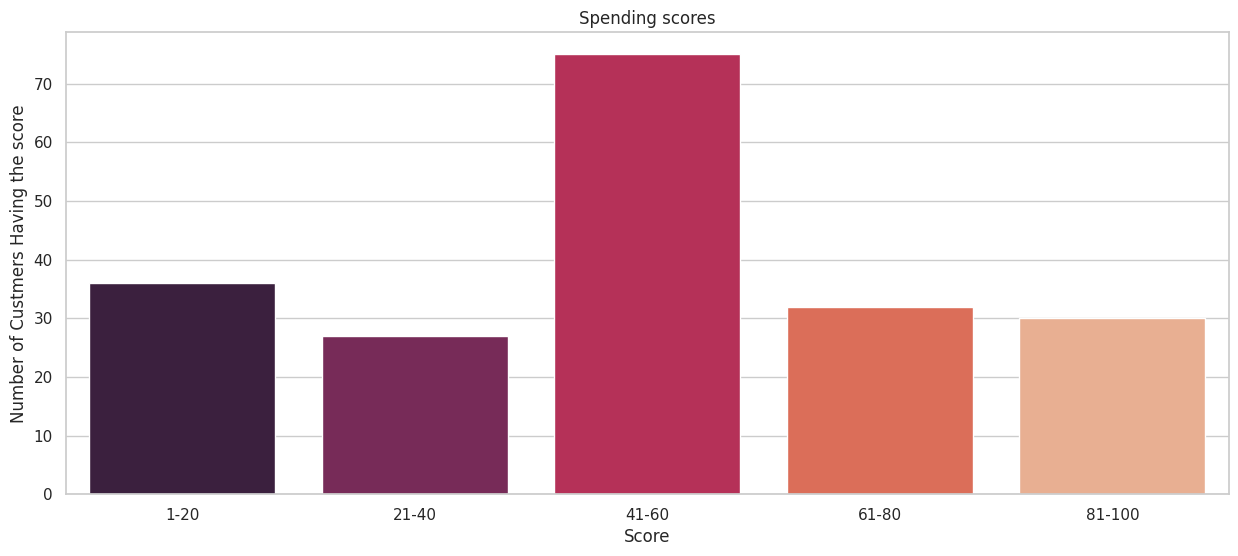

In [ ]:
ss_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]


ssx = ["1-20","21-40","41-60","61-80","81-100"]
ssy = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y= ssy, palette="rocket")
plt.title("Spending scores")
plt.xlabel("Score")
plt.ylabel("Number of Custmers Having the score")
plt.show()


#### Insights
* In the spending score the maximum values range is 41-60 points

#### To divide the annual income to 5 equal parts

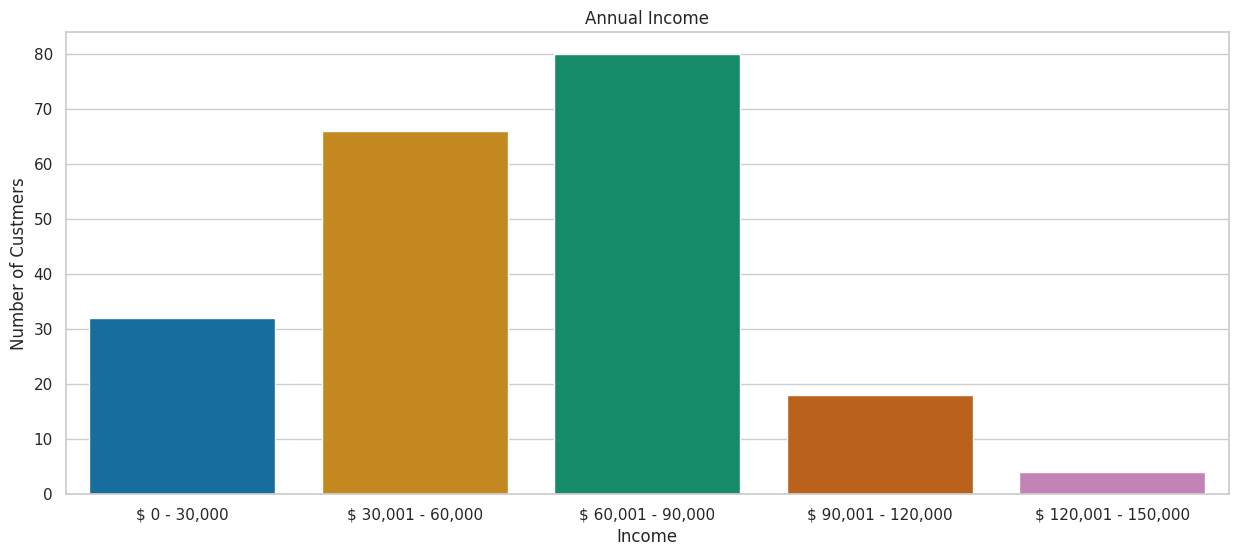

In [ ]:
Ai_0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
Ai_31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
Ai_61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
Ai_91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
Ai_121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]


Aix = ["$ 0 - 30,000","$ 30,001 - 60,000","$ 60,001 - 90,000","$ 90,001 - 120,000","$ 120,001 - 150,000"]
Aiy = [len(Ai_0_30.values),len(Ai_31_60.values),len(Ai_61_90.values),len(Ai_91_120.values),len(Ai_121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=Aix, y= Aiy, palette="colorblind")
plt.title("Annual Income")
plt.xlabel("Income")
plt.ylabel("Number of Custmers")
plt.show()


#### Insights
* The maximum annual income range is $60-90K per year

### Model Building

#### Import the Kmeans clustering algorithm
* It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.
* To cluster the Age and spending score columns

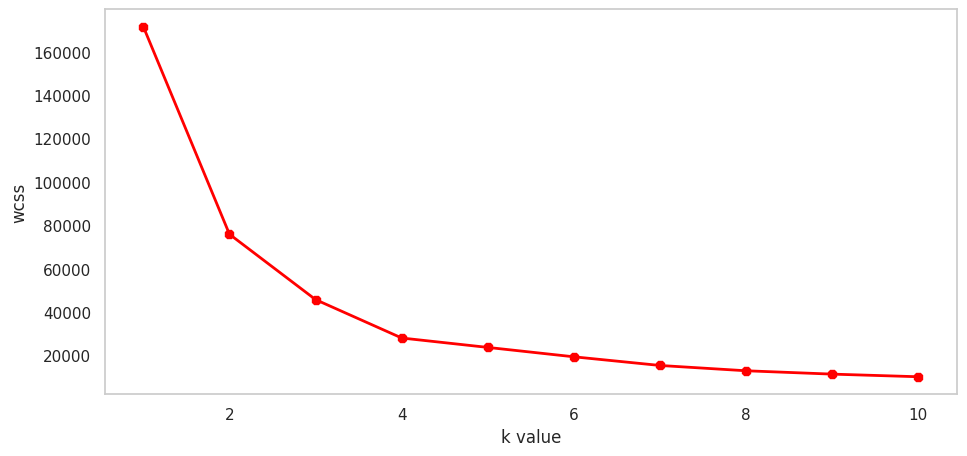

In [ ]:
X1 =  df.loc[:, ["Age","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss=[]

for k in range(1,11):
  kmeans = KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(11,5))
plt.grid()
plt.plot(range(1,11),wcss, linewidth = 2, color="red", marker ="8")
plt.xlabel("k value")
plt.ylabel("wcss")
plt.show()

#### Insights
* The optimize k value is 4 clusters


#### Build a cluster model
* To create a clauster for the 4 clusters

In [ ]:
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(X1)

print(label)

[2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 2 2 3 1 2 1 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3
 1 3 1 0 1 0 2 3 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 2 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 2 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 2 2 2 2 0 0 0 0 2 2 2 1 2 1 0 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 0 1
 3 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


#### Check the centroid 
* We need to choose some random k points or centroid to form the cluster. These points can be either the points from the dataset or any other point. So, here we are selecting the below two points as k points, which are not the part of our dataset. consider the image given below

In [ ]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [43.29166667 15.02083333]]


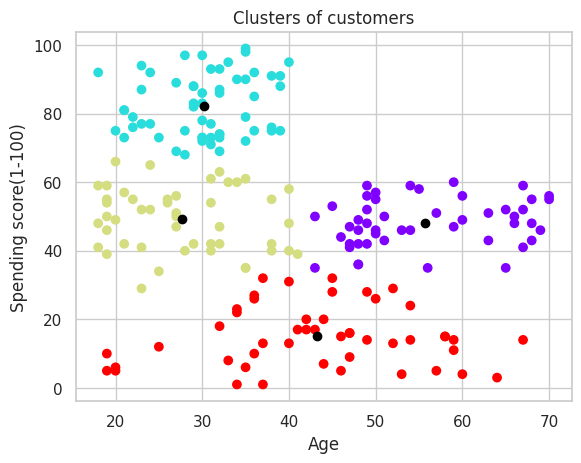

In [ ]:
plt.scatter(X1[:,0],X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black')
plt.title("Clusters of customers")
plt.xlabel("Age")
plt.ylabel("Spending score(1-100)")
plt.show()

#### Build a cluster in Annual income and spending score
* It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.
* To cluster the Annual income and spending score columns

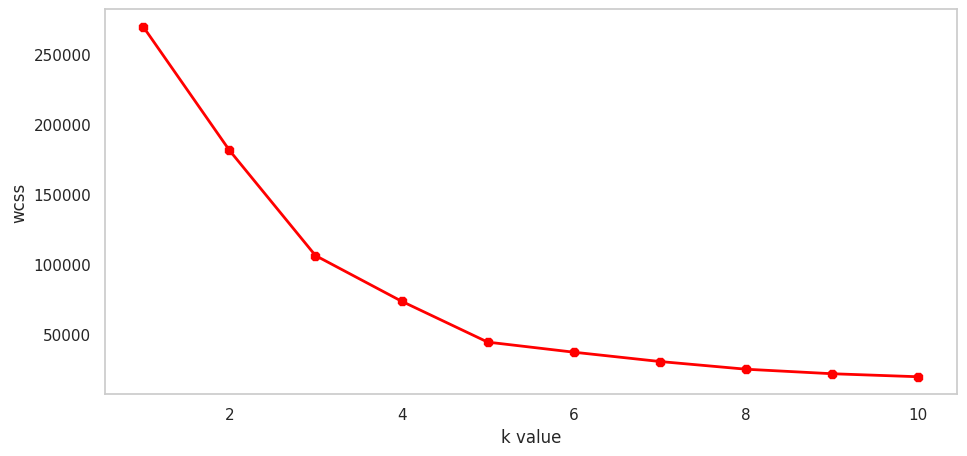

In [ ]:
X2 =  df.loc[:, ["Annual Income (k$)","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss=[]

for k in range(1,11):
  kmeans = KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X2)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(11,5))
plt.grid()
plt.plot(range(1,11),wcss, linewidth = 2, color="red", marker ="8")
plt.xlabel("k value")
plt.ylabel("wcss")
plt.show()

#### Insights
* The optimize k value is 5 clusters


#### Build a cluster model
* To create a model with the 5 clusters

In [ ]:
kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict(X2)

print(label)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 3 4 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 3 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


#### Check the centroid 
* We need to choose some random k points or centroid to form the cluster. These points can be either the points from the dataset or any other point. So, here we are selecting the below two points as k points, which are not the part of our dataset. consider the image given below

In [ ]:
print(kmeans.cluster_centers_)

[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]]


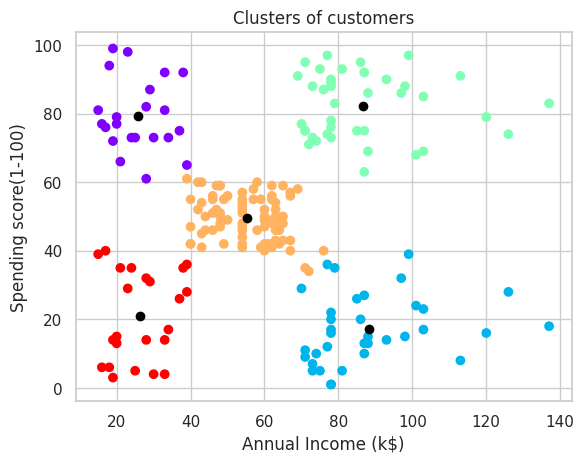

In [ ]:
plt.scatter(X2[:,0],X2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black')
plt.title("Clusters of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending score(1-100)")
plt.show()

#### Build a cluster in Annual income, spending score and Age
* It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.
* To cluster the Annual income, spending score and Age columns

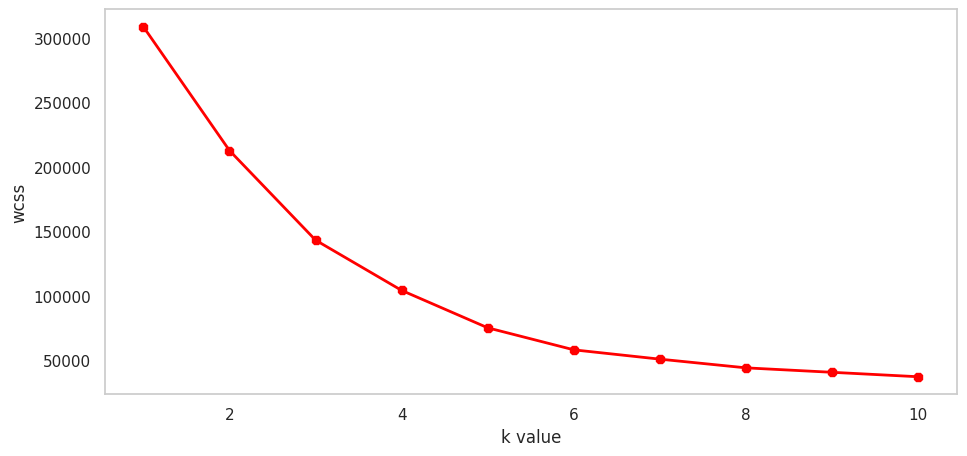

In [ ]:
X3 =  df.iloc[:,1:]

from sklearn.cluster import KMeans
wcss=[]

for k in range(1,11):
  kmeans = KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X3)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(11,5))
plt.grid()
plt.plot(range(1,11),wcss, linewidth = 2, color="red", marker ="8")
plt.xlabel("k value")
plt.ylabel("wcss")
plt.show()

#### Insights
* The optimize k value is 5 clusters


In [ ]:
kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict(X3)

print(label)

[2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 4 1 3 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 3 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


#### Check the centroid 
* We need to choose some random k points or centroid to form the cluster. These points can be either the points from the dataset or any other point. So, here we are selecting the below two points as k points, which are not the part of our dataset. consider the image given below

In [ ]:
print(kmeans.cluster_centers_)

[[25.52173913 26.30434783 78.56521739]
 [32.69230769 86.53846154 82.12820513]
 [45.2173913  26.30434783 20.91304348]
 [43.08860759 55.29113924 49.56962025]
 [40.66666667 87.75       17.58333333]]


#### Insights
K-means clustering is a popular unsupervised machine learning technique that is often used in customer segmentation. Customer segmentation involves dividing a customer base into groups of individuals who share similar characteristics, needs, or behaviors. K-means clustering helps identify patterns within customer data and group customers based on their similarities, allowing businesses to improve their marketing strategies to better understand the needs of each customer segment.